In [1]:
import scipy as sp, numpy as np, pandas as pd
import matplotlib.pyplot as plt

# 1D diffusion

Let's take 100 random steps, and accumulate in a list

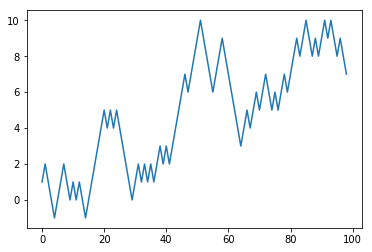

In [2]:
stepsize = 1.0
numsteps = 100
position = []
x = 0.0
for i in range(1,numsteps):
    if np.random.rand() > 0.5:
        x = x + stepsize
    else:
        x = x - stepsize
    position.append(x)
plt.plot(position)

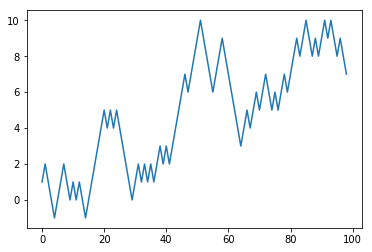

In [3]:
pos = np.array(position)
plt.plot(pos)

In [4]:
np.average(pos)

4.767676767676767

In [5]:
np.average(pos[-10])

8.0

In [7]:
df = pd.DataFrame(pos)

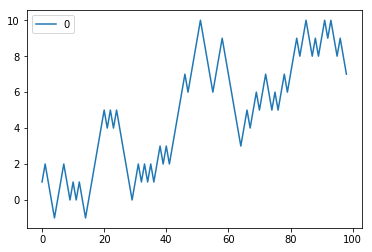

In [9]:
df.plot()

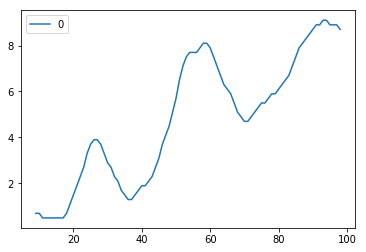

In [20]:
df.rolling(window=10).mean().plot()

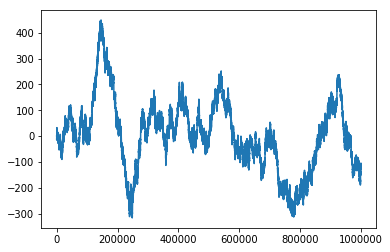

In [21]:
stepsize = 1.0
numsteps = 1000000
position = np.zeros(numsteps)
x = 0.0
for i in range(1,numsteps):
    if np.random.rand() > 0.5:
        x = x + stepsize
    if np.random.rand() <= 0.5:
        x = x - stepsize
    position[i] = x
plt.plot(position)

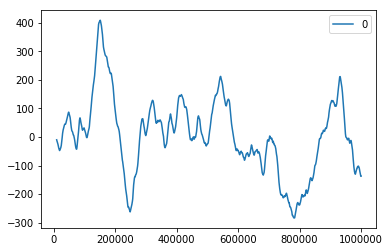

In [24]:
pd.DataFrame(position).rolling(window=10000).mean().plot()

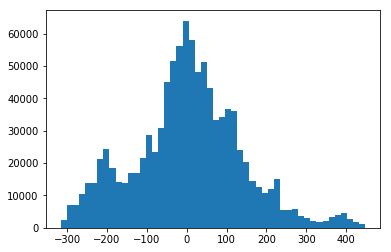

In [25]:
junk = plt.hist(position,50)

In [27]:
steps = np.random.rand(10)
print (steps)

[0.85307506 0.92793722 0.33037131 0.92550701 0.41373829 0.74456793
 0.607351   0.03009604 0.04139751 0.15302217]


In [29]:
steps[steps>0.5] = 1
print (steps)

[1.         1.         0.33037131 1.         0.41373829 1.
 1.         0.03009604 0.04139751 0.15302217]


In [31]:
steps[steps<0.5] = -1
print (steps)

[ 1.  1. -1.  1. -1.  1.  1. -1. -1. -1.]


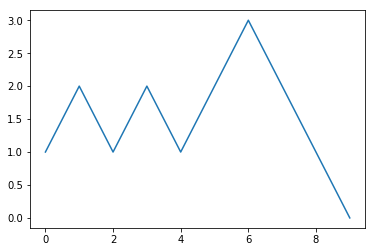

In [32]:
onetraj = np.cumsum(steps)
plt.plot(onetraj)

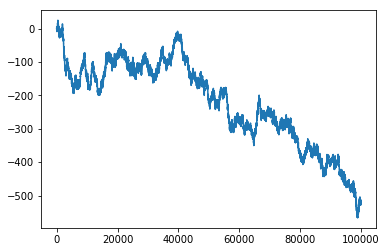

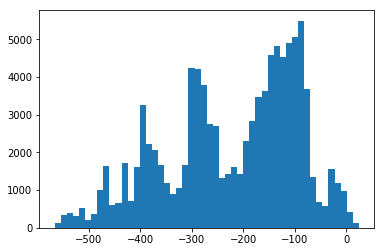

In [33]:
steps = np.random.rand(100000)
steps[steps>0.5] = 1
steps[steps<=0.5] = -1
onetraj = np.cumsum(steps)
plt.plot(onetraj)
plt.figure()
junk= plt.hist(onetraj,50)

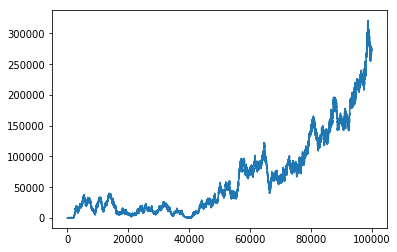

In [34]:
plt.plot(onetraj**2)

Text(0.5, 0, 'time')

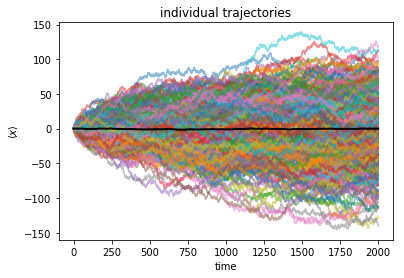

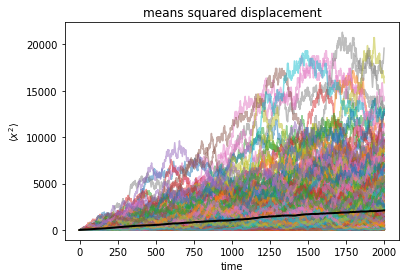

In [35]:
numtrajs = 500
numsteps = 2000
times = range(numsteps)
steps = np.random.random((numtrajs,numsteps))
steps[steps>0.5] = 1
steps[steps<=0.5] = -1
trajs = np.cumsum(steps,axis=1)
for traj in trajs:
    plt.plot(times,traj,alpha=0.5)
plt.plot(times,np.average(trajs,axis=0),color='black',lw=2)
plt.title('individual trajectories')
plt.ylabel(r'$\left<x\right>$')
plt.xlabel('time')
plt.figure()
for traj in trajs:
    plt.plot(times,traj**2,alpha=0.5)
plt.plot(times,np.average(trajs**2,axis=0),color='black',lw=2)
plt.title('means squared displacement')
plt.ylabel(r'$\left<x^2\right>$')
plt.xlabel('time')

# What if want biased random walk?
"Drunks on a hill"